# *Fixed Income - Homework 2*

# 1. Consider the following bonds (each with a face value of $100 and annual coupon payments)

|Bond Name|Maturity|Coupon Rate(%)|YTM(%)|
|:--------|:-------|:-------------|:-----|
| Athens  | 1 Year | 2.0          | 4.0  |
| Belgrade| 1 Year | 6.0          | 4.0  |
| Canberra| 5 Year | 2.0          | 4.0  |
| Dublin  | 5 Year | 6.0          | 4.0  |
|Edinburgh|10 Years| 2.0          | 4.0  |
| Freetown|10 Years| 6.0          | 4.0  |
|Georgetown| 20 Years | 2.0          | 4.0  |
| Havana  | 20 Years | 6.0          | 4.0  |


## (a) Compute the price, duration, and convexity for each of these bonds assuming (1) semi-annual, and (2) continuous compounding frequency.

In case of **discrete compounding** with $m$ annual compounding periods, price, duration and convexity of a bond, as a function of a cash flow $CF$ and yield $y$, are
$$ Price(CF, y) = \sum_{j=1}^{n} \frac{CF_j}{(1+y/m)^{jm}} $$
$$ \$ Duration(CF, y) = \frac{d}{dy}P = \sum_{j=1}^{n} \frac{-j \cdot CF_j}{(1+y/m)^{jm+1}} $$
$$ \$ Convexity(CF, y) = \frac{d}{dy} \$ Duration = \sum_{j=1}^{n} \frac{j(jm+1) \cdot CF_j}{m (1+y/m)^{jm+2}} $$

In case of **continuos compounding** with, price, duration and convexity of a bond are:
$$ Price(CF, y) = \sum_{j=1}^{n} CF_j e^{-y \cdot j} $$
$$ \$ Duration(CF, y) = \frac{d}{dy}P = \sum_{j=1}^{n}  CF_j \cdot (-j) e^{-y \cdot j}  $$
$$ \$ Convexity(CF, y) = \frac{d}{dy} \$ Duration = \sum_{j=1}^{n}  CF_j \cdot j^2 e^{-y \cdot j} $$

**WARNING:** $j$ in definition above is **not the same** as $i$ in functions below. Actually, mapping between the two is $j = i+1$ because $i$ below starts counting from 0.


**Macaulay Duration** for two compounding approaches ($m$-annual and continuous) are \[ovo sam izveo, proverio sa Vasiljevicem, i proverio sa wikipediom https://en.wikipedia.org/wiki/Bond_duration ]

$$ MacD(CF, y) = \sum_{j=1}^{n} \frac{j \cdot CF_j}{P(1+y/m)^{jm+1}} $$

$$ MacD(CF, y) = \sum_{j=1}^{n} \frac{j \cdot CF_j \cdot e^{-y \cdot j}}{P}  $$



In [1]:
import numpy as np
import math
import pandas as pd

def generate_cash_flows(maturity, coupon_rate, num_annual_payments: int=1, principle=100):
    """Generates list of coupon payments, and coupon + principal as the last element of the list
    
    maturity : float
      has to have following property: (maturity * num_annual_payments) should be int, or convertable to int without truncation

    coupon_rate : float
      must be in natural units, not in percents
    """
    number_of_coupons = int(maturity * num_annual_payments)
    single_coupon_value = coupon_rate * principle / num_annual_payments
    cash_flows = [single_coupon_value] * number_of_coupons 
    cash_flows[-1] = cash_flows[-1] + principle
    return cash_flows

def present_value(cash_flows, ytm, compounding_freq = 2):
    """
    cash_flows : list
      annual cuoun payemnts and the principal+coupon at the end

    ymt : double
     yeild to maturuty. Must be in decimal form (natural units), i.e. if YTM is 4%, then 'ytm' must be ytm = .04  

    compounding_freq : int
      Annual compounding / discounging frequency. Variable 'm' form lectures (slides)

      compounding_freq = 2 - semi-annual compounding 
      compounding_freq = 0 - continuous compounding 
    """
    if compounding_freq:
        discounted_payments = [cash_flows[i] / ((1+ytm/compounding_freq)**(compounding_freq*(i+1))) for i in range(len(cash_flows))]
    else: # continuous compounding case
        discounted_payments = [cash_flows[i] * math.e**(-(i+1)*ytm ) for i in range(len(cash_flows))]
    return sum(discounted_payments)

def duration(cash_flows, ytm, compounding_freq = 2):
    """analogues to 'present_value' function"""
    if compounding_freq:
        discounted_payments = [cash_flows[i] * (-i-1) / ((1+ytm/compounding_freq)**(compounding_freq*(i+1)+1)) for i in range(len(cash_flows))]
    else:
        discounted_payments = [cash_flows[i] * (-(i+1)) * (math.e**(-(i+1)*ytm)) for i in range(len(cash_flows))]
    return sum(discounted_payments)

def MacDuration(cash_flows, ytm, compounding_freq = 2):
    """analogues to 'present_value' function"""
    if compounding_freq:
        discounted_payments = [cash_flows[i] * (i+1) / (((1+ytm/compounding_freq)**(compounding_freq*(i+1)+1)) * present_value(cash_flows, ytm, compounding_freq)) for i in range(len(cash_flows))]
    else:
        discounted_payments = [cash_flows[i] * ((i+1)) * (math.e**(-(i+1)*ytm)) / present_value(cash_flows, ytm, compounding_freq) for i in range(len(cash_flows))]
    return sum(discounted_payments)

def convexity(cash_flows, ytm, compounding_freq = 2):
    """analogues to 'present_value' function"""
    if compounding_freq:
        discounted_payments = [cash_flows[i] *  (i+1) * ((i+1)*compounding_freq+1) / (compounding_freq * (1+ytm/compounding_freq)**(compounding_freq*(i+1)+2)) for i in range(len(cash_flows))]
    else:
        discounted_payments = [cash_flows[i] * ((i+1)**2) * (math.e**(-(i+1)*ytm)) for i in range(len(cash_flows))]
    return sum(discounted_payments)

In [2]:
# import 'table1.csv' provided in email
df = pd.read_csv("table1.csv")
df

,name,maturity,coupon_rate,ytm
0,Athens,1,2,4
1,Belgrade,1,6,4
2,Canberra,5,2,4
3,Dublin,5,6,4
4,Edinburgh,10,2,4
5,Freetown,10,6,4
6,Georgetown,20,2,4
7,Havana,20,6,4


In [3]:
df["cash_flows"] = df.apply(lambda row: generate_cash_flows(maturity=row["maturity"], coupon_rate=row["coupon_rate"]/100, num_annual_payments=1, principle=100), axis=1)

df["price_semiannual"] = df.apply(lambda row: present_value(row["cash_flows"], row["ytm"]/100, compounding_freq = 2), axis=1)
df["dolar_duration_semiannual"] = df.apply(lambda row: duration(row["cash_flows"], row["ytm"]/100, compounding_freq = 2), axis=1)
df["MacD_semiannual"] = df.apply(lambda row: MacDuration(row["cash_flows"], row["ytm"]/100, compounding_freq = 2), axis=1)
df["convexity_semiannual"] = df.apply(lambda row: convexity(row["cash_flows"], row["ytm"]/100, compounding_freq = 2), axis=1)
df["relative_convexity_semiannual"] = df["convexity_semiannual"] / df["price_semiannual"]

# cena u kontinualnom se poklapa sa Vasilijevom racunicom
df["price_continual"] = df.apply(lambda row: present_value(row["cash_flows"], row["ytm"]/100, compounding_freq = 0), axis=1)
df["dolar_duration_continual"] = df.apply(lambda row: duration(row["cash_flows"], row["ytm"]/100, compounding_freq = 0), axis=1)
df["MacD_continual"] = df.apply(lambda row: MacDuration(row["cash_flows"], row["ytm"]/100, compounding_freq = 0), axis=1)
df["convexity_continual"] = df.apply(lambda row: convexity(row["cash_flows"], row["ytm"]/100, compounding_freq = 0), axis=1)
df["relative_convexity_continual"] = df["convexity_continual"] / df["price_continual"]


df.drop(columns="cash_flows", axis=1)

,name,maturity,coupon_rate,ytm,price_semiannual,dolar_duration_semiannual,MacD_semiannual,convexity_semiannual,relative_convexity_semiannual,price_continual,dolar_duration_continual,MacD_continual,convexity_continual,relative_convexity_continual
0,Athens,1,2,4,98.039216,-96.116878,0.980392,141.348350,1.441753,98.000523,-98.000523,1.000000,98.000523,1.000000
1,Belgrade,1,6,4,101.883891,-99.886167,0.980392,146.891423,1.441753,101.843681,-101.843681,1.000000,101.843681,1.000000
2,Canberra,5,2,4,90.928479,-427.599121,4.702587,2270.830444,24.973809,90.756477,-435.305401,4.796411,2140.303099,23.582924
3,Dublin,5,6,4,108.715776,-478.534324,4.401701,2475.778867,22.772950,108.523280,-487.185451,4.489225,2327.255532,21.444759
4,Edinburgh,10,2,4,83.486671,-741.899886,8.886447,7376.021123,88.349685,83.188520,-753.863537,9.062110,7267.415340,87.360796
5,Freetown,10,6,4,115.865747,-906.148024,7.820672,8544.443611,73.744345,115.501551,-920.950519,7.973490,8395.845100,72.690323
6,Georgetown,20,2,4,72.373674,-1132.226292,15.644173,21008.070062,290.272260,71.919448,-1146.502658,15.941483,21118.599146,293.642397
7,Havana,20,6,4,126.542940,-1620.638031,12.807021,27329.271656,215.968363,125.892552,-1642.192118,13.044395,27409.480308,217.721223


## (b) Based on your results, provide comments regarding the impact of (1) maturity, and (2) coupon rate on the bond price, duration, and convexity.

- For bonds with coupon rate bigger than YTM (premium bonds), we see that prices are bigger than principal, and vice versa: if coupon rate is smaller that YTM (discount bond), the price is smaller than a principal. It is intuitive: cash flows from annual coupons are bigger than depreciation of the future payment of the principal.

- For premium bonds price is bigger when maturity is bigger and for discount bond price is smaler if maturity is bigger.

- Bonds with higher coupons have shorter Macaulay duration but higher dollar duration, ceteris paribus. The lower a bond’s coupon, the longer
its duration, because proportionately
less payment is received before final
maturity. The higher a bond’s coupon,
the shorter its duration, because
proportionately more payment is received
before final maturity. 

- Bonds with longer maturities have longer duration, ceteris paribus The longer a bond’s maturity, the longer
its duration, because it takes more time
to receive full payment. The shorter a
bond’s maturity, the shorter its duration,
because it takes less time to receive
full payment.


- Bonds with higher coupon rates have lower convexity and higher dollar convexity, ceteris paribus.This lessening of risk is because market rates would have to increase greatly to surpass the coupon on the bond, meaning there is less interest rate risk to the investor.
- Bonds with longer maturities have higher convexity and dollar convexity, ceteris paribus. More time means there is more interest rate risk to the investor.





**For the lower coupon rate price decreases with the maturity whereas for the higher coupon rate price increases with the maturity**

For a lower coupon rate bond price increases with the maturity 
For a higher coupon rate bond price increases with the maturity

For a given coupon rate bonds duration and convexity are increasing with the maturity


For a given maturity bonds price inreases with the increase in coupon rate

For a given maturity bonds duration and convexity decreases with the increase in coupon rate



## (c) Assuming an instantaneous increase in the YTM of 2%, estimate the pricing errors of the duration and duration–convexity approximations (relative to the full valuation approach). Comment your results.

We used following approximations of a bond price for a change $\Delta y$ in yields:
- Duration approximation ("dur_approx" in dataframe) 
$$ P_{D} (y_0 +\Delta y) ≈ P(y_0) + P'(y_0)Δy$$

- Duration-Convexity approximation ("dur_conv_approx" in dataframe)

$$ P_{DC} (y_0 +\Delta y) ≈ P(y_0) + P'(y_0)Δy +  \frac{1}{2} P''(y_0)(Δy)^2$$

Approximation errors are computed as 
$$P(y_0+\Delta y) - P_{D} (y_0+\Delta y)$$
labeled as "dur_approx_error", and 
$$P(y_0+\Delta y) - P_{DC} (y_0+\Delta y)$$
labeled as "dur_conv_approx_error" in df dataframe.

In [4]:
def duration_approx(cash_flows, ytm, compounding_freq, dy):
    return present_value(cash_flows, ytm, compounding_freq) + duration(cash_flows, ytm, compounding_freq)*dy

def dur_conv_approx(cash_flows, ytm, compounding_freq, dy):
    return present_value(cash_flows, ytm, compounding_freq) + duration(cash_flows, ytm, compounding_freq)*dy + 0.5*convexity(cash_flows, ytm, compounding_freq)*(dy**2)

In [5]:
# Note: we are using continuous compounding
df["full_price"]  = df.apply(lambda row: present_value(row["cash_flows"], row["ytm"]/100 + .02, compounding_freq = 0), axis=1)
df["duration_approx"] = df.apply(lambda row: duration_approx(row["cash_flows"], row["ytm"]/100, compounding_freq = 0, dy=.02), axis=1)
df["dur_conv_approx"] = df.apply(lambda row: dur_conv_approx(row["cash_flows"], row["ytm"]/100, compounding_freq = 0, dy=.02), axis=1)
df["dur_approx_error"] = (df["full_price"] - df["duration_approx"]) / df["full_price"]
df["dur_conv_approx_error"] = (df["dur_conv_approx"] - df["full_price"]) / df["full_price"]
df[["name", "maturity", "coupon_rate", "ytm", "full_price", "dur_conv_approx", "dur_conv_approx", "dur_approx_error", "dur_conv_approx_error"]]

,name,maturity,coupon_rate,ytm,full_price,dur_conv_approx,dur_conv_approx,dur_approx_error,dur_conv_approx_error
0,Athens,1,2,4,96.059982,96.060112,96.060112,0.000203,0.000001
1,Belgrade,1,6,4,99.827041,99.827176,99.827176,0.000203,0.000001
2,Canberra,5,2,4,82.464625,82.478429,82.478429,0.005023,0.000167
3,Dublin,5,6,4,99.230230,99.245022,99.245022,0.004542,0.000149
4,Edinburgh,10,2,4,69.474099,69.564732,69.564732,0.019617,0.001305
5,Freetown,10,6,4,98.659970,98.761710,98.761710,0.015989,0.001031
6,Georgetown,20,2,4,52.721129,53.213115,53.213115,0.070783,0.009332
7,Havana,20,6,4,97.924546,98.530606,98.530606,0.049792,0.006189


**2. Suppose you decide to invest today $100,000 in a risk-free bond (B) with the maturity of
10 years and the coupon rate of 5%. The yield curve is assumed to be flat at 2% at the
time of the bond purchase.**
<br>Remark: For all bonds, the coupon payments and compounding frequency are semi-annual.

(a) As a cautious and prudent investor, you are concerned that yields might rise, and
would therefore like to hedge the interest rate risk. Assume that you have an access
to a hedging instrument (H1), which is actually another bond with the maturity of
15 years, coupon rate of 6%, and face value of $10,000. Assuming that only small
parallel shifts of the yield curve are possible, compute how many units of the hedging
instrument you should buy or sell to eliminate the interest rate risk

**NOTE:** We assume it is possible to buy fractional bonds for simplicity of calculation. The value of the principal payment of the original bond is arbitrarily chosen to match the principal of the $H_1$ instrument.

In [6]:
original_cf = generate_cash_flows(maturity=10, coupon_rate=.05, num_annual_payments=2, principle=10_000) 
h1_cf = generate_cash_flows(maturity=15, coupon_rate=.06, num_annual_payments=2, principle=10_000) 
present_value(original_cf, ytm=.02, compounding_freq=2)

10800.447571932262

We have \$100.000 to invest in the bond valued \$10.800,45 , hance we will by $100.000 / $10.800,45 units: 


In [7]:
units_in_pi = 100_000 / present_value(original_cf, ytm=.02, compounding_freq=2)
units_in_pi

9.258875554368293


In order to make a duration hedge for \$100.000 dollars invested in the original bond, we assume that we will have extra capital to invest in $H_1$ (we do not assume that \$100k is meant for portfolio plus hedge; if it is, then it is just a problem of rescaling). In order to hedge against interest rate risk, we have to buy the following number of $H_1$ instruments

$$ n = - \frac{\$ Duration(\pi)}{\$ Duration(h_1)} $$

In [8]:
# cash flow of pi, which is 9.258 units of original bond
pi_cf = [units_in_pi * payment for payment in original_cf] 

n = - duration(pi_cf, ytm=.02, compounding_freq=2) / duration(h1_cf, ytm=.02, compounding_freq=2)
n

-6.234119830984455

We should by -6.2341 units of $H_1$ instrument. Negative number indicates shorting $H_1$.


(b) Compare the impact of an instantaneous rise in the yield curve of 20 basis points
(bps) on your bond price with and without the hedging instrument. Comment your
results.

In [9]:
# Net change of portfolio value without hedge 
PnL_no_hedge = (
    present_value(pi_cf, ytm=.02  + .002, compounding_freq=2) 
  - present_value(pi_cf, ytm=.02, compounding_freq=2))

PnL_no_hedge

-3140.4701475562033

In [10]:
# Net change of the value of portfolio with hedge
# cash flow of n*h1, i.e. of entire hadge part of portfolio
hedge_cf = [n * payment for payment in h1_cf] 

PnL_with_hedge = (
      present_value(pi_cf, ytm=.02  + .002, compounding_freq=2) 
    + present_value(hedge_cf, ytm=.02 + .002 , compounding_freq=2)
    - present_value(pi_cf, ytm=.02, compounding_freq=2) 
    - present_value(hedge_cf, ytm=.02, compounding_freq=2))

PnL_with_hedge

-23.51655591117742

(c) Compare the impact of an instantaneous rise in the yield curve of 200 bps on your
bond price with and without the hedging instrument. Comment your results.

In [11]:
# Net change of portfolio value without hedge 
PnL_no_hedge_big_shock = (
    present_value(pi_cf, ytm=.02  + .02, compounding_freq=2) 
  - present_value(pi_cf, ytm=.02, compounding_freq=2))

PnL_no_hedge_big_shock

-26720.78436478018

In [12]:
# Net change of the value of portfolio with hedge
# cash flow of n*h1, i.e. of entire hadge part of portfolio
hedge_cf = [n * payment for payment in h1_cf] 

PnL_with_hedge_big_shock = (
      present_value(pi_cf, ytm=.02  + .02, compounding_freq=2) 
    + present_value(hedge_cf, ytm=.02 + .02 , compounding_freq=2)
    - present_value(pi_cf, ytm=.02, compounding_freq=2) 
    - present_value(hedge_cf, ytm=.02, compounding_freq=2))

PnL_with_hedge_big_shock

-1760.1615586248518

(d) Assume now that you could use yet another bond as a second hedging instrument (H2).
The maturity is 5 years and the coupon rate is 4%. How many units of each hedging
instrument should your buy or sell to be hedged against large parallel upward shifts
in the yield curve? What is the impact of the duration–convexity hedging relative to
the duration hedging in the case when there is an instantaneous rise in the yield curve
of 200 bps?

In [13]:
import sympy as sp

n1, n2 = sp.symbols('n1, n2')

h1_cf = generate_cash_flows(maturity=15, coupon_rate=.06, num_annual_payments=2, principle=10_000) 
h2_cf = generate_cash_flows(maturity=5, coupon_rate=.04, num_annual_payments=2, principle=10_000) 

pi_duration  = duration(pi_cf, ytm=.02, compounding_freq=2)
h1_duration  = duration(h1_cf, ytm=.02, compounding_freq=2)
h2_duration  = duration(h2_cf, ytm=.02, compounding_freq=2)

pi_convexity = convexity(pi_cf, ytm=.02, compounding_freq=2)
h2_convexity = convexity(h1_cf, ytm=.02, compounding_freq=2)
h2_convexity = convexity(h2_cf, ytm=.02, compounding_freq=2)

n1,n2 = sp.symbols('n1,n2')

eq1 = sp.Eq(pi_duration  + n1 * h1_duration  + n2 * h2_duration, 0)
eq2 = sp.Eq(pi_convexity + n1 * h2_convexity + n2 * h2_convexity, 0)

solution = list(sp.solve((eq1,eq2),(n1,n2)).values())
n1_sol = solution[0]
n2_sol = solution[1]

n1_sol, n2_sol

(8.29801672875006, -41.1490256240907)

In [14]:
hedge_cf_1 = [n1_sol * payment for payment in h1_cf] 
hedge_cf_2 = [n2_sol * payment for payment in h2_cf] 
# values of the two hedge components
present_value(hedge_cf_1, ytm=.02, compounding_freq=2) , present_value(hedge_cf_2, ytm=.02, compounding_freq=2)

(101353.664010341, -411120.824936723)

In [15]:
 portfolio_value = (
    + present_value(pi_cf, ytm=.02, compounding_freq=2) 
    + present_value(hedge_cf_1, ytm=.02, compounding_freq=2)
    + present_value(hedge_cf_2, ytm=.02, compounding_freq=2)) 
 
 portfolio_value

-209767.160926383

In [16]:
PnL_with_DurConv_hedge = (
      present_value(pi_cf, ytm=.02  + .02, compounding_freq=2) 
    + present_value(hedge_cf_1, ytm=.02 + .02 , compounding_freq=2)
    + present_value(hedge_cf_2, ytm=.02 + .02 , compounding_freq=2)
    - present_value(pi_cf, ytm=.02, compounding_freq=2) 
    - present_value(hedge_cf_1, ytm=.02, compounding_freq=2)
    - present_value(hedge_cf_2, ytm=.02, compounding_freq=2))

PnL_with_DurConv_hedge

7636.31956086739

In [17]:
delta_ys = np.arange(-0.05, 0.05, 0.001)

def PnL_with_CD(dy):
  PnL_with_DurConv_hedge = (
      present_value(pi_cf, ytm=.02  + dy, compounding_freq=2) 
    + present_value(hedge_cf_1, ytm=.02 + dy , compounding_freq=2)
    + present_value(hedge_cf_2, ytm=.02 + dy , compounding_freq=2)
    - present_value(pi_cf, ytm=.02  , compounding_freq=2) 
    - present_value(hedge_cf_1, ytm=.02  , compounding_freq=2)
    - present_value(hedge_cf_2, ytm=.02  , compounding_freq=2))
  return PnL_with_DurConv_hedge 

def PnL_with_D(dy):
  PnL_with_Dur_hedge = (
      present_value(pi_cf, ytm=.02  + dy, compounding_freq=2) 
    + present_value(hedge_cf, ytm=.02 + dy , compounding_freq=2)
    - present_value(pi_cf, ytm=.02  , compounding_freq=2) 
    - present_value(hedge_cf, ytm=.02 , compounding_freq=2))
  return PnL_with_Dur_hedge

def PnL_zero_hedge(dy):
  PnL_with_Dur_hedge = (
      present_value(pi_cf, ytm=.02  + dy, compounding_freq=2)
    - present_value(pi_cf, ytm=.02  , compounding_freq=2))
  return PnL_with_Dur_hedge

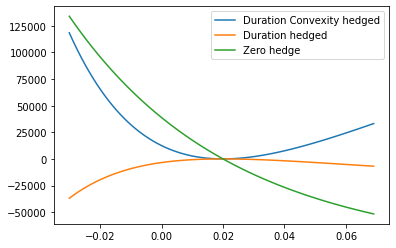

In [18]:
PnLs_DC_hedged = list(map(PnL_with_CD, delta_ys))
PnLs_D_hedged = list(map(PnL_with_D, delta_ys))
PnLs_non_hedged = list(map(PnL_zero_hedge, delta_ys))
ys = list(delta_ys + 0.02)

import matplotlib.pyplot as plt
plt.plot(ys,PnLs_DC_hedged, label='Duration Convexity hedged')
plt.plot(ys,PnLs_D_hedged, label='Duration hedged')
plt.plot(ys,PnLs_non_hedged, label='Zero hedge')
plt.legend()
# ovde nesto smrdi

**3. Consider the following set of on-the-run bonds:**

|Bond Name|Maturity|Coupon Rate(%)|Bond Price ($)|
|:--------|:-------|:-------------|:-------------|
| Antigua & Barbuda  | 0.5 Year | 1.00          | 99.50  |
| Bahamas| 1.0 Year | 2.00         | 99.00  |
| Cape Verde| 1.5 Years | 3.00          | 98.00  |
| Dominica  | 2.0 Years | 3.50          | 99.50  |
|East Timor|2.5 Years| 4.00          | 100.50  |
| Fiji|3.0 Years| 4.50          | 101.25  |
|Grenada| 3.5 Years | 4.75          | 102.00  |
| Haiti  | 4.0 Years | 5.00          |100.00  |
|Iceland| 4.5 Years | 5.50          | 101.50  |
| Jamaica  | 5.0 Years | 5.50          | 100.50  |

(a) Bootstrap the spot rate curve for the given set of maturities. Assume semi-annual
coupon payments and compounding.
<br>Hint: Use the discount factors notation to cast the problem in a matrix format. 
<br>To complete this task you can use, e.g., <font color='blue'>numpy.linalg.solve</font> in Python.

In [19]:
table2 = pd.read_csv("table2.csv")
table2

,name,maturity,coupon_rate,price
0,Antigua and Barbuda,0.5,1.00,99.50
1,Bahamas,1.0,2.00,99.00
2,Cape Verde,1.5,3.00,98.00
3,Dominica,2.0,3.50,99.50
4,East Timor,2.5,4.00,100.50
5,Fiji,3.0,4.50,101.25
6,Grenada,3.5,4.75,102.00
7,Haiti,4.0,5.00,100.00
8,Iceland,4.5,5.50,101.50
9,Jamaica,5.0,5.50,100.50


In [20]:
# cf is tested, computes well with non-int maturity
table2["cash_flows"] = table2.apply(lambda row: generate_cash_flows(maturity=row["maturity"], coupon_rate=row["coupon_rate"]/100, num_annual_payments=2, principle=100), axis=1)

for cf in table2["cash_flows"]:
    cf.extend([0.0]*(10-len(cf)))

table2#.drop(columns="cash_flows", axis=1)


,name,maturity,coupon_rate,price,cash_flows
0,Antigua and Barbuda,0.5,1.00,99.50,"[100.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
1,Bahamas,1.0,2.00,99.00,"[1.0, 101.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,Cape Verde,1.5,3.00,98.00,"[1.5, 1.5, 101.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
3,Dominica,2.0,3.50,99.50,"[1.7500000000000002, 1.7500000000000002, 1.750..."
4,East Timor,2.5,4.00,100.50,"[2.0, 2.0, 2.0, 2.0, 102.0, 0.0, 0.0, 0.0, 0.0..."
5,Fiji,3.0,4.50,101.25,"[2.25, 2.25, 2.25, 2.25, 2.25, 102.25, 0.0, 0...."
6,Grenada,3.5,4.75,102.00,"[2.375, 2.375, 2.375, 2.375, 2.375, 2.375, 102..."
7,Haiti,4.0,5.00,100.00,"[2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 102.5, 0.0..."
8,Iceland,4.5,5.50,101.50,"[2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.7..."
9,Jamaica,5.0,5.50,100.50,"[2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.7..."


In [21]:
matrix = np.array([cf for cf in table2["cash_flows"]])
inverse = np.linalg.inv(matrix) 

np.dot(inverse, matrix) 

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 8.67361738e-19,  8.67361738e-19,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 5.21802264e-18,  1.74857569e-18, -1.72087126e-18,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  3.46944695e-18,  3.46944695e-18,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.

In [22]:
B = inverse.dot(np.array([cf for cf in table2["price"]])) 
B

array([0.99004975, 0.97039555, 0.93654514, 0.92806159, 0.9102931 ,
       0.8860193 , 0.86592683, 0.81738314, 0.79233232, 0.76139398])

In [23]:
T = np.array([cf for cf in table2["maturity"]])

In [24]:
# SPOT RATES
r_bootstraped = [b**(-1/t) -1 for b,t in zip(B,T)]
r_bootstraped

[0.020201510062877404,
 0.03050761421319792,
 0.04467416810326941,
 0.03803405264816884,
 0.038311107968872715,
 0.04116351092062476,
 0.04198751432831571,
 0.05170413432175658,
 0.05308888536897727,
 0.056034513612836845]

In [25]:
# PROVERE RADI -> dobro je izracunato

import numpy as np

def bonds_cf(cr,maturity,compounding,face=100):
    frekvencija=maturity*compounding
    cf=[face*cr/compounding]*int(frekvencija)
    cf[-1]=face*(1+cr/compounding)
    return cf

liste=list(np.arange(0.5,5.5,0.5))#maturities
kuponi=[1/100,2/100,3/100,3.5/100,4/100,4.5/100,4.75/100,5/100,5.5/100,5.5/100]#coupon rates
ja=np.zeros([10]*2)      
        
for i in range(len(liste)):
    if len(bonds_cf(kuponi[i],liste[i],2))<10:
        ja[i,:]=bonds_cf(kuponi[i],liste[i],2)+[0]*(10-len(bonds_cf(kuponi[i],liste[i],2)))
    elif len(bonds_cf(kuponi[i],liste[i],2))==10:
        ja[9,:]=bonds_cf(kuponi[9],liste[9],2)

cijene=np.array([99.5,99,98,99.5,100.5,101.25,102,100,101.5,100.5])

cijene=np.reshape(cijene,(10,1))
spot_rates=np.linalg.solve(ja,cijene)

t=np.arange(0.5,5.5,0.5)

spot_ispravljeno=[]
for i in range(len(spot_rates.T[0])):
  spot_ispravljeno.append((1/np.power(spot_rates.T[0][i],1/t[i]))-1)

[s - R for s, R in zip(spot_ispravljeno, r_bootstraped)]

[-6.661338147750939e-16,
 0.0,
 -2.220446049250313e-16,
 0.0,
 0.0,
 0.0,
 0.0,
 -2.220446049250313e-16,
 0.0,
 0.0]

In [26]:
spot_ispravljeno 

[0.020201510062876737,
 0.03050761421319792,
 0.044674168103269185,
 0.03803405264816884,
 0.038311107968872715,
 0.04116351092062476,
 0.04198751432831571,
 0.051704134321756356,
 0.05308888536897727,
 0.056034513612836845]

(b) Imply the six-month forward rates from the bootstrapped spot rate curve.

**comment:**
For forward rates we use descrete compounding.

In [27]:
periodi=np.arange(0.5,5.5,0.5)

fr=[]#forward rates
for i in range(1,len(periodi)):
    a=((((1+spot_ispravljeno[i])**periodi[i])/((1+spot_ispravljeno[i-1])**periodi[i-1]))-1)**0.5 #kvadratni koren zbog 6 mes fw
    fr.append(a)
fr

[0.1423158708879624,
 0.19011551826995313,
 0.09560938243476047,
 0.13971230605966356,
 0.16551877648770402,
 0.15232670289982847,
 0.24369889877741596,
 0.17781046971313877,
 0.20157828480545065]

**4. Consider the spot rate curve {r0,t} derived in the Problem 3. Furthermore, assume that a
cubic polynomial can be used to fit the spot rate curve, i.e.,**
<br> $$\hat{r}_{0,t} = c_{0} + c_{1}t + c_{2}t^2 + c_{3}t^3.$$

(a) Estimate the coefficients ci (i = 1, 2, 3, 4) by choosing only four points on the spot
rate curve. Justify your choices of target spot rates.
<br>Hint: Create a system of four equations with four variables and cast the problem in a
matrix format.

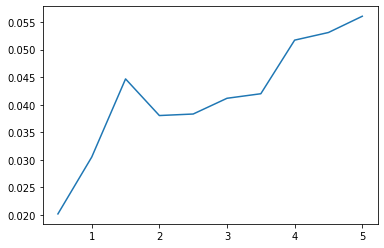

In [28]:
plt.plot(T, r_bootstraped)

We wil pick maturities at indecies 0, 3, 6 and 9

In [29]:
T_ind = [0, 3, 6, 9] # 0.5 , 2 , 3.5 , 5

In [30]:
matrix=np.zeros([4,4])

def poli(t):
    return [1, t, t**2, t**3]

matrix[0] = poli(0.5)
matrix[1] = poli(2)
matrix[2] = poli(3.5)
matrix[3] = poli(5)
matrix

array([[  1.   ,   0.5  ,   0.25 ,   0.125],
       [  1.   ,   2.   ,   4.   ,   8.   ],
       [  1.   ,   3.5  ,  12.25 ,  42.875],
       [  1.   ,   5.   ,  25.   , 125.   ]])

In [31]:
inv_mat = np.linalg.inv(matrix)

In [32]:
c = inv_mat.dot(np.array([r_bootstraped[0], r_bootstraped[3], r_bootstraped[6], r_bootstraped[9]]))
c

array([ 0.00702967,  0.03114133, -0.01018724,  0.00118383])

We calculated coefficients $c_i$, and stored them in 'c' array.

If we picked other points, polinomial would have much different look. For example, if we picked just the first four dots we would have the following results, which is not covering entire rage well (overfits the early part of rate curve):

In [33]:
matrica=np.zeros([4,4])

# these are just first four points, not 0, 3rd, 6th nad 9th as before
matrica[0]=[1, 0.5, 0.5**2, 0.5**3]
matrica[1]=[1, 1, 1, 1]
matrica[2]=[1, 1.5, 1.5**2, 1.5**3]
matrica[3]=[1, 2, 2**2, 2**3]

r = [spot_ispravljeno[i] for i in range(4)]
r = np.array(r)
r.reshape(4, 1)

c0,c1,c2,c3=np.linalg.solve(matrica,r)

#kada se izaberu prve 4 tacke
c0,c1,c2,c3

(0.03842297473722733,
 -0.08141524422998743,
 0.10638937581918696,
 -0.03288949211322893)


**comment:** we are more interested in more recent spot rates in comparison to more distant ones, as they provide more realistic price since liquidity is better and the larger the time horizon there is more chance for uncertainty.

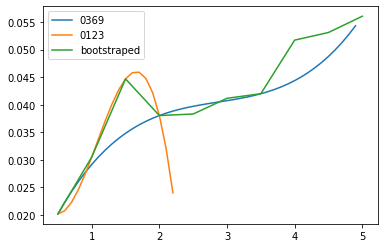

In [34]:
def curve0369(t):
    return 1*c[0] + t*c[1] + c[2]*t**2 + c[3]*t**3

def curve0123(t):
    return 1*c0 + t*c1 + c2*t**2 + c3*t**3

T_array = np.arange(0.5, 5, 0.1)
r0369 = [curve0369(t) for t in T_array]
r0123 = [curve0123(t) for t in T_array]

plt.plot(T_array, r0369, label = "0369")
plt.plot(T_array[:18], r0123[:18], label = "0123") # overfitted the first part
plt.plot(T, r_bootstraped, label = "bootstraped")
plt.legend()

b) Estimate the coefficients ci (i = 1, 2, 3, 4) by fitting the cubic polynomial to the full
set of spot rates.
<br><ins>Hint:</ins> Estimate the coefficients by solving the following optimization problem:
<br> 
<br> $$\min_{c1,c2,c3,c4}\sum_{t}(r_{0,t} − \hat{r}_{0,t})^2$$
<br>To complete this task you can use, e.g., scipy.optimize in Python.


In [35]:
poli3 = np.polyfit(T, r_bootstraped, deg=3)

(c) Generate theoretical model curves for both approaches (i.e., the reduced and full curve
fitting) using the estimated parameters. Draw them in the same graph together with
the discrete set of bootstrapped spot rates which were calculated in the Problem 3.

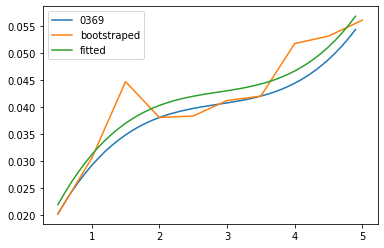

In [36]:
def curve0369(t):
    return 1*c[0] + t*c[1] + c[2]*t**2 + c[3]*t**3

def fitted(t):
    return 1*poli3[3] + t*poli3[2] + poli3[1]*t**2 + poli3[0]*t**3

T_array = np.arange(0.5, 5, 0.1)
r0369 = [curve0369(t) for t in T_array]
fitted_r = [fitted(t) for t in T_array]

plt.plot(T_array, r0369, label = "0369")
plt.plot(T, r_bootstraped, label = "bootstraped")
plt.plot(T_array, fitted_r, label = "fitted")
plt.legend()

(d) Comment your results.

**comment:** 4points as polinomial qube aproximation give good approximation for the part in which they are fitted, due to the polynomial exponential nature of the expression which must generate curvature in higher orders. MSFE is good aproximation.